In [1]:
import pangolin as pg
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
# simple model, single unbiased pollster

num_time_steps = 100

# first, create data
z = pg.autoregressive(lambda last:pg.normal(last,.1),num_time_steps)(50.0)
pollster_noise = pg.exp(pg.normal(-1,1))
poll = pg.slot()
with pg.Loop(num_pollsters) as i:
   pollster_bias[i] = pg.normal(0, 2)
   pollster_noise[i] = pg.exp(pg.normal(-1,1))
   poll[i] = pg.vmap(pg.normal,[0,None])(z+pollster_bias[i],pollster_noise[i])

In [57]:
num_time_steps = 100
num_pollsters = 5

# first, create data
z = pg.autoregressive(lambda last:pg.normal(last,.1),num_time_steps)(50.0)
# pollster_bias = [pg.normal(0,.25) for _ in range(num_pollsters)]
# pollster_noise = [pg.exp(pg.normal(-2,1)) for _ in range(num_pollsters)]
# poll = [pg.vmap(pg.normal,[0,None])(z+bias,noise) for (bias,noise) in zip
# (pollster_bias,pollster_noise)]
pollster_bias = pg.slot()
pollster_noise = pg.slot()
poll = pg.slot()
with pg.Loop(num_pollsters) as i:
   pollster_bias[i] = pg.normal(0, 2)
   pollster_noise[i] = pg.exp(pg.normal(-1,1))
   poll[i] = pg.vmap(pg.normal,[0,None])(z+pollster_bias[i],pollster_noise[i])

ancestor sampling


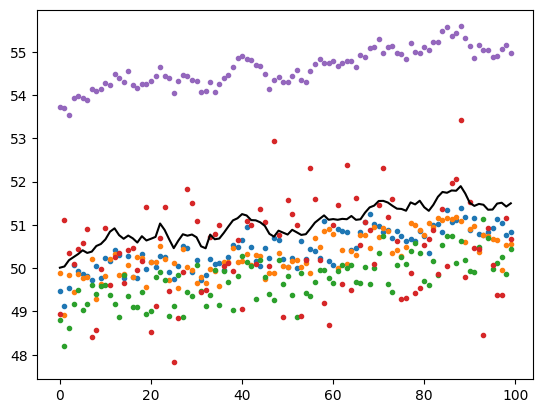

In [58]:
z_samples, poll_samples = pg.sample([z,poll],niter=1)
plt.clf()
for i in range(num_pollsters):
    plt.plot(poll_samples[-1,i,:],'.')
plt.plot(z_samples[-1,:],'k-')

In [5]:
poll_samples.shape

(1, 5, 100)